In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import PIL 
from PIL import Image

print(tf.__version__)

2.4.1


In [ ]:
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####


In [2]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import csv

SKIP_NEGATIVES = False
NEGATIVE_CLASS = "No-Object"

In [56]:
# CONVERT MULTIPLE TXT TO A SINGLE CSV


def txt_to_csv(path, skipNegatives, ds):
    print("start")
    txt_list = []
    for txt_file in glob.glob(path + '/*.txt'):
        #print("txt_file: ", txt_file)
        f = open(txt_file, 'r')
        content = f.read()
        split = content.split()
        fileName = txt_file
        replaced = 'C:/Users/evanp/AI/Capstone/bounded_dataset/' + ds + '\\'
        z = fileName.replace(replaced, '')
        y = z.replace(".txt", ".jpg")
        #x = y.replace("\\", "/")
        #print("fileName: ", x)
        split.append(y)
        print(split)
        f.close()
        c = open('C:/Users/evanp/AI/Capstone/bounded_dataset/' + ds + "_data.csv", 'a')
        writer = csv.writer(c)
        writer.writerow(split)
        c.close()
    
    
    
    
def main():
    datasets = ['Training', 'Validation']

    for ds in datasets:
        #image_path = os.path.join(os.getcwd(), 'Images', ds)
        image_path = 'C:/Users/evanp/AI/Capstone/bounded_dataset/' + ds
        txt_df = txt_to_csv(image_path, SKIP_NEGATIVES, ds)
        #txt_df.to_csv('Data/{}_data.csv'.format(ds), index=None)
        print('Successfully converted txt to csv.')


main()

start
['0', '0.491667', '0.502083', '0.483333', '0.320833', '20210909_125548 - Copy.jpg']
['0', '0.483333', '0.510417', '0.500000', '0.345833', '20210909_125548.jpg']
['0', '0.533333', '0.591667', '0.477778', '0.325000', '20210909_125551 - Copy.jpg']
['0', '0.525000', '0.583333', '0.494444', '0.350000', '20210909_125551.jpg']
['0', '0.619444', '0.664583', '0.461111', '0.362500', '20210909_125553 - Copy.jpg']
['0', '0.611111', '0.670833', '0.444444', '0.341667', '20210909_125553.jpg']
['0', '0.697222', '0.750000', '0.516667', '0.391667', '20210909_125555 - Copy.jpg']
['0', '0.694444', '0.750000', '0.477778', '0.383333', '20210909_125555.jpg']
['0', '0.736111', '0.779167', '0.483333', '0.400000', '20210909_125556 - Copy.jpg']
['0', '0.733333', '0.787500', '0.488889', '0.383333', '20210909_125556.jpg']
['0', '0.683333', '0.770833', '0.466667', '0.383333', '20210909_125557 - Copy.jpg']
['0', '0.680556', '0.762500', '0.483333', '0.400000', '20210909_125557.jpg']
['0', '0.569444', '0.766667'

['0', '0.450000', '0.508333', '0.511111', '0.475000', '20210909_130731.jpg']
['0', '0.533333', '0.516667', '0.444444', '0.441667', '20210909_130733.jpg']
['0', '0.697222', '0.564583', '0.427778', '0.420833', '20210909_130734(0).jpg']
['0', '0.625000', '0.554167', '0.405556', '0.450000', '20210909_130734.jpg']
['0', '0.725000', '0.572917', '0.405556', '0.412500', '20210909_130735.jpg']
['0', '0.738889', '0.652083', '0.466667', '0.437500', '20210909_130736.jpg']
['0', '0.622222', '0.641667', '0.477778', '0.475000', '20210909_130738.jpg']
['0', '0.558333', '0.662500', '0.461111', '0.466667', '20210909_130739.jpg']
['0', '0.447222', '0.643750', '0.461111', '0.429167', '20210909_130740.jpg']
['0', '0.302778', '0.650000', '0.461111', '0.458333', '20210909_130741.jpg']
['0', '0.300000', '0.416667', '0.477778', '0.491667', '20210909_130742(0).jpg']
['0', '0.327778', '0.522917', '0.544444', '0.479167', '20210909_130742.jpg']
['0', '0.355556', '0.302083', '0.522222', '0.520833', '20210909_130743

In [14]:
#TAKE CSV DATA AND CREATE TRAINING DATASET
TRAINING_CSV_FILE = 'C:/Users/evanp/AI/Capstone/bounded_dataset/training_data.csv'
TRAINING_IMAGE_DIR = 'C:/Users/evanp/AI/Capstone/bounded_dataset/Training'

training_image_records = pd.read_csv(TRAINING_CSV_FILE)

train_image_path = os.path.join(os.getcwd(), TRAINING_IMAGE_DIR)
print("train_image_path: ", train_image_path)

train_images = [] #actual image
train_targets = [] #location of image
train_labels = [] #classification on image

for index, row in training_image_records.iterrows():
    
    #(filename, width, height, class_name, xmin, ymin, xmax, ymax) = row
    (class_name, xCenter, yCenter, width, height, filename) = row
    #Represented as a percentage of the entire image, so I multiply
    #by the true image width/height to get the actual pixel value.
    print('xCenter | yCenter | width | height')
    print(xCenter, '|', yCenter, '|', width, '|', height)
    
    height = round(float(height) * 240)
    width = round(float(width) * 180)
    xCenter = xCenter * 180
    yCenter = yCenter * 240
    
    xmin = xCenter - (width/2)
    xmax = xCenter + (width/2)
    ymin = yCenter - (height/2)
    ymax = yCenter + (height/2)

    print('xmin | xmax | ymin | ymax')
    print(xmin, '|', xmax, '|', ymin, '|', ymax)
    
    #filename = "20210909_125548 - Copy.jpg"
    train_image_fullpath = os.path.join(train_image_path, filename)
    print(train_image_fullpath)
    #train_img = keras.preprocessing.image.load_img(train_image_fullpath, target_size=(height, width))
    train_img = keras.preprocessing.image.load_img(train_image_fullpath, target_size=(240, 180))
    train_img_arr = keras.preprocessing.image.img_to_array(train_img)
    
    
    xmin = round(xmin/ width, 2)
    ymin = round(ymin/ height, 2)
    xmax = round(xmax/ width, 2)
    ymax = round(ymax/ height, 2)
    
    
    train_images.append(train_img_arr)
    train_targets.append((xmin, ymin, xmax, ymax))
    #train_targets.append((0, 0, 180, 240))
    train_labels.append(class_name)
    
  






    
#TAKE CSV DATA AND CREATE VALIDATION DATASET
VALIDATION_CSV_FILE = 'C:/Users/evanp/AI/Capstone/bounded_dataset/validation_data.csv'
VALIDATION_IMAGE_DIR = 'C:/Users/evanp/AI/Capstone/bounded_dataset/Validation'

validation_image_records = pd.read_csv(VALIDATION_CSV_FILE)

validation_image_path = os.path.join(os.getcwd(), VALIDATION_IMAGE_DIR)

validation_images = [] #actual image
validation_targets = [] #location of image
validation_labels = [] #classification on image

for index, row in validation_image_records.iterrows():
    
    #(filename, width, height, class_name, xmin, ymin, xmax, ymax) = row
    (class_name, xCenter, yCenter, width, height, filename) = row
    #Represented as a percentage of the entire image, so I multiply
    #by the true image width/height to get the actual pixel value.
    print('xCenter | yCenter | width | height')
    print(xCenter, '|', yCenter, '|', width, '|', height)
    
    
    height = round(float(height) * 240)
    width = round(float(width) * 180)
    xCenter = xCenter * 180
    yCenter = yCenter * 240
    
    xmin = xCenter - (width/2)
    xmax = xCenter + (width/2)
    ymin = yCenter - (height/2)
    ymax = yCenter + (height/2)

    print('xmin | xmax | ymin | ymax')
    print(xmin, '|', xmax, '|', ymin, '|', ymax, '\n')
    
    
    validation_image_fullpath = os.path.join(validation_image_path, filename)
    print(validation_image_fullpath)
    #validation_img = keras.preprocessing.image.load_img(validation_image_fullpath, target_size=(height, width))
    validation_img = keras.preprocessing.image.load_img(validation_image_fullpath, target_size=(240, 180))
    validation_img_arr = keras.preprocessing.image.img_to_array(validation_img)
    
    
    #xmin = round(xmin/ width, 2)
    #ymin = round(ymin/ height, 2)
    #xmax = round(xmax/ width, 2)
    #ymax = round(ymax/ height, 2)
    
    validation_images.append(validation_img_arr)
    validation_targets.append((xmin, ymin, xmax, ymax))
    #validation_targets.append((0, 0, 180, 240))
    validation_labels.append(class_name)

train_image_path:  C:/Users/evanp/AI/Capstone/bounded_dataset/Training
xCenter | yCenter | width | height
0.483333 | 0.510417 | 0.5 | 0.345833
xmin | xmax | ymin | ymax
41.99994000000001 | 131.99994 | 81.00008 | 164.00008
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_125548.jpg
xCenter | yCenter | width | height
0.533333 | 0.591667 | 0.477778 | 0.325
xmin | xmax | ymin | ymax
52.999939999999995 | 138.99993999999998 | 103.00008000000003 | 181.00008000000003
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_125551 - Copy.jpg
xCenter | yCenter | width | height
0.525 | 0.583333 | 0.49444399999999994 | 0.35
xmin | xmax | ymin | ymax
50.0 | 139.0 | 97.99992 | 181.99992
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_125551.jpg
xCenter | yCenter | width | height
0.619444 | 0.664583 | 0.461111 | 0.3625
xmin | xmax | ymin | ymax
69.99992 | 152.99992 | 115.99992 | 202.99992
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_125553 - Copy.jpg
xCent

xCenter | yCenter | width | height
0.672222 | 0.31875 | 0.566667 | 0.329167
xmin | xmax | ymin | ymax
69.99996 | 171.99996 | 37.0 | 116.0
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_130546.jpg
xCenter | yCenter | width | height
0.611111 | 0.489583 | 0.533333 | 0.304167
xmin | xmax | ymin | ymax
61.999979999999994 | 157.99998 | 80.99992 | 153.99992
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_130548.jpg
xCenter | yCenter | width | height
0.46388900000000005 | 0.510417 | 0.527778 | 0.295833
xmin | xmax | ymin | ymax
36.000020000000006 | 131.00002 | 87.00008 | 158.00008
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_130549.jpg
xCenter | yCenter | width | height
0.427778 | 0.525 | 0.588889 | 0.291667
xmin | xmax | ymin | ymax
24.00004 | 130.00004 | 91.0 | 161.0
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_130550.jpg
xCenter | yCenter | width | height
0.252778 | 0.589583 | 0.49444399999999994 | 0.270833
xmin | xmax | ymin | ymax

0.725 | 0.572917 | 0.40555599999999997 | 0.4125
xmin | xmax | ymin | ymax
94.0 | 167.0 | 88.00008 | 187.00008
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_130735.jpg
xCenter | yCenter | width | height
0.738889 | 0.652083 | 0.466667 | 0.4375
xmin | xmax | ymin | ymax
91.00002 | 175.00002 | 103.99992 | 208.99992
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_130736.jpg
xCenter | yCenter | width | height
0.622222 | 0.641667 | 0.477778 | 0.475
xmin | xmax | ymin | ymax
68.99996000000002 | 154.99996000000002 | 97.00008 | 211.00008
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_130738.jpg
xCenter | yCenter | width | height
0.558333 | 0.6625 | 0.461111 | 0.466667
xmin | xmax | ymin | ymax
58.999939999999995 | 141.99993999999998 | 103.0 | 215.0
C:/Users/evanp/AI/Capstone/bounded_dataset/Training\20210909_130739.jpg
xCenter | yCenter | width | height
0.447222 | 0.64375 | 0.461111 | 0.429167
xmin | xmax | ymin | ymax
38.99996 | 121.99996 | 103.0 | 206.

In [15]:
#convert lists to tensors

print(type(train_images))
print(len(train_images))

#train_images = np.array(train_images)
#train_targets = np.array(train_targets)
#train_labels = np.array(train_labels)
#validation_images = np.array(validation_images)
#validation_targets = np.array(validation_targets)
#validation_labels = np.array(validation_labels)

#train_images = tf.convert_to_tensor(train_images)
#train_targets = tf.convert_to_tensor(train_targets)
#train_labels = tf.convert_to_tensor(train_labels)
#validation_images = tf.convert_to_tensor(validation_images)
#validation_targets = tf.convert_to_tensor(validation_targets)
#validation_labels = tf.convert_to_tensor(validation_labels)

train_images = tf.ragged.constant(train_images)
train_targets = tf.ragged.constant(train_targets)
train_labels = tf.ragged.constant(train_labels)
validation_images = tf.ragged.constant(validation_images)
validation_targets = tf.ragged.constant(validation_targets)
validation_labels = tf.ragged.constant(validation_labels)



print(type(train_images))
#print(train_images)
#print(len(train_images))

<class 'list'>
136
<class 'tensorflow.python.ops.ragged.ragged_tensor.RaggedTensor'>


In [17]:
train_images = train_images.to_tensor()
train_targets = train_targets.to_tensor()
train_labels = train_labels.to_tensor()
validation_images = validation_images.to_tensor()
validation_targets = validation_targets.to_tensor()
validation_labels = validation_labels.to_tensor()


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'to_tensor'

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import pandas as pd
from PIL import Image 
from PIL.ImageDraw import Draw

width = 180
height = 240
num_classes = 3
# 0=I, 1=L, 2=T
classes = ["0", "1", "2"]

In [19]:
input_layer = layers.Input((height,width,3), name='input_layer')
#input_layer = layers.Input((None, None, 3), name='input_layer')
base_layers = layers.experimental.preprocessing.Rescaling(1./255, name='base_1')(input_layer)
base_layers = layers.Conv2D(16, 3, padding='same', activation='relu', name='base_extra')(base_layers)
#base_layers = layers.Input((28,28,1))(input_layer)
base_layers = layers.Dense(256, activation="selu", name='base_2')(base_layers)
base_layers = layers.Dense(128, activation="selu", name='base_3')(base_layers)
base_layers = layers.Conv2D(128,3, padding='same', name='base_4')(base_layers)
base_layers = layers.MaxPooling2D(name='base_5')(base_layers)
base_layers = layers.Dropout(rate=0.2, name='base_6')(base_layers)
base_layers = layers.Dense(64, activation="selu", name='base_7')(base_layers)
base_layers = layers.Dense(32, activation="selu", name='base_8')(base_layers)
base_layers = layers.Conv2D(32,3, padding='same', name='base_9')(base_layers)
base_layers = layers.MaxPooling2D(name='base_10')(base_layers)

classifier_branch = layers.Flatten(name='class_1')(base_layers)
classifier_branch = layers.Dense(3, name='class_head')(classifier_branch)

locator_branch = layers.Dense(128, activation='relu', name='locator_1')(base_layers)
locator_branch = layers.Dense(64, activation='relu', name='locator_2')(locator_branch)
locator_branch = layers.Dense(32, activation='relu', name='locator_3')(locator_branch)
                                #using sigmoid because not looking at image but numbers
locator_branch = layers.Flatten(name='loc_3')(locator_branch)
locator_branch = layers.Dense(4, activation='sigmoid', name='locator_head')(locator_branch)


model = tf.keras.Model(input_layer, outputs=[classifier_branch,locator_branch])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 240, 180, 3) 0                                            
__________________________________________________________________________________________________
base_1 (Rescaling)              (None, 240, 180, 3)  0           input_layer[0][0]                
__________________________________________________________________________________________________
base_extra (Conv2D)             (None, 240, 180, 16) 448         base_1[0][0]                     
__________________________________________________________________________________________________
base_2 (Dense)                  (None, 240, 180, 256 4352        base_extra[0][0]                 
______________________________________________________________________________________________

In [20]:
#MODEL IS MADE AND INFORMATION HAS BEEN MADE, NOW LETS COMPILE AND FIT MODEL

#defining loss model
losses = {
    "class_head":tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    "locator_head":tf.keras.losses.MSE
}

#compile based on type of layer
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss= losses,
    metrics=["accuracy"],
)

#Define dictionary for train and validation
trainTargets = {
    "class_head": train_labels,
    "locator_head": train_targets
}

validationTargets = {
    "class_head": validation_labels,
    "locator_head": validation_targets
}


print("train_images.shape: " ,train_images.shape)
print("train_targets.shape: " ,train_targets.shape)
print("train_targets: " ,train_targets)
print("train_labels.shape: " ,train_labels.shape)
print("validation_images.shape: " ,validation_images.shape)
print("validation_targets.shape: " ,validation_targets.shape)
print("validation_labels.shape: " ,validation_labels.shape)




#fit model
history = model.fit(train_images, trainTargets,
             validation_data=(validation_images, validationTargets),
             batch_size=1,
             epochs=2,
             shuffle=True,
             verbose=1)


train_images.shape:  (136, 240, 180, 3)
train_targets.shape:  (136, 4)
train_targets:  tf.Tensor(
[[0.47 0.98 1.47 1.98]
 [0.62 1.32 1.62 2.32]
 [0.56 1.17 1.56 2.17]
 [0.84 1.33 1.84 2.33]
 [0.87 1.46 1.87 2.46]
 [0.85 1.41 1.85 2.41]
 [0.95 1.46 1.95 2.46]
 [1.02 1.45 2.02 2.45]
 [1.   1.55 2.   2.55]
 [0.96 1.51 1.96 2.51]
 [0.91 1.41 1.91 2.41]
 [0.71 1.5  1.71 2.5 ]
 [0.7  1.45 1.7  2.45]
 [0.53 1.49 1.53 2.49]
 [0.5  1.49 1.5  2.49]
 [0.31 1.47 1.31 2.47]
 [0.12 1.54 1.12 2.54]
 [0.14 1.6  1.14 2.6 ]
 [0.36 1.56 1.36 2.56]
 [0.01 1.53 1.01 2.53]
 [0.01 1.53 1.01 2.53]
 [0.01 1.79 1.01 2.79]
 [0.31 1.68 1.31 2.68]
 [0.54 1.69 1.54 2.69]
 [0.86 1.69 1.86 2.69]
 [1.19 1.72 2.19 2.72]
 [1.01 0.89 2.01 1.89]
 [0.86 0.97 1.86 1.97]
 [0.6  1.01 1.6  2.01]
 [0.45 1.01 1.45 2.01]
 [0.33 0.95 1.33 1.95]
 [0.15 0.94 1.15 1.94]
 [0.02 0.97 1.02 1.97]
 [0.01 0.54 1.01 1.54]
 [0.16 0.56 1.16 1.56]
 [0.26 0.61 1.26 1.61]
 [0.42 0.63 1.42 1.63]
 [0.54 0.55 1.54 1.55]
 [0.67 0.52 1.67 1.52]
 [0.8

In [21]:
prediction = model.predict(train_images)
print(prediction)

[array([[ 254.41238, -244.17029, -243.36871],
       [ 254.1651 , -244.23756, -243.6875 ],
       [ 254.1651 , -244.23756, -243.6875 ],
       [ 253.99442, -244.53928, -243.71486],
       [ 253.99442, -244.53928, -243.71486],
       [ 253.37189, -243.73868, -243.18817],
       [ 253.37189, -243.73868, -243.18817],
       [ 253.27515, -243.63504, -243.19034],
       [ 253.27515, -243.63504, -243.19034],
       [ 253.71936, -243.75745, -243.16599],
       [ 253.71936, -243.75745, -243.16599],
       [ 253.55472, -243.58463, -242.62149],
       [ 253.55472, -243.58463, -242.62149],
       [ 253.93762, -244.31244, -243.10123],
       [ 253.93762, -244.31244, -243.10123],
       [ 254.04346, -244.05856, -243.40802],
       [ 254.4256 , -244.56076, -243.68878],
       [ 254.4256 , -244.56076, -243.68878],
       [ 254.04346, -244.05856, -243.40802],
       [ 254.24435, -244.39186, -243.51591],
       [ 254.24435, -244.39186, -243.51591],
       [ 253.3531 , -242.39719, -241.90285],
       [ 

In [ ]:
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####


In [ ]:
img_height = 28
img_width = 28

model = keras.Sequential([
    #complex
    layers.Input((28,28,1)), #28 * 28 pixels, only 1 color (greyscale)
    #layers.LayerNormalization(axis=1),
    layers.Dense(256, activation="selu"), #256 nodes,  activation = rectify linear unit, fast activation function
    layers.Dense(128, activation="selu"),
    layers.Conv2D(128,3, padding='same'),
    layers.MaxPooling2D(),
    layers.Dropout(rate=0.2),
    layers.Dense(64, activation="selu"),
    layers.Dense(32, activation="selu"),
    layers.Conv2D(32,3, padding='same'), #2d convulution layer
    layers.MaxPooling2D(),#downsamples input so that feature maps can be created. usually added after convulution layer
    layers.Flatten(name='cl_1'), #[[1],[2],[3]] --> [1,2,3]
    layers.Dense(3, name='cl_head'), #representing 3 classes, output layer
    layers.Activation('softmax')
    #simple
    #layers.Input((28,28,1)),
    #layers.Flatten(input_shape=(28, 28, 3)), 
    #layers.Dense(64, activation="relu"),
    #layers.Dropout(0.3),
    #layers.Dense(3),
])

model.summary()

In [ ]:
#SPLITTING DATA
#Train file contains ALL pictures, at random move 50% to the Validation file
import os
import shutil

#Moving I
source = "C:/Users/evanp/AI/Capstone/Demo_images/Train/I"
destination = "C:/Users/evanp/AI/Capstone/Demo_images/Validation/I"
files = os.listdir(source)
for f in files:
    if np.random.rand(1) < 0.5:
        shutil.move(source + '/'+ f, destination + '/'+ f)

#moving L
source = "C:/Users/evanp/AI/Capstone/Demo_images/Train/L"
destination = "C:/Users/evanp/AI/Capstone/Demo_images/Validation/L"
files = os.listdir(source)
for f in files:
    if np.random.rand(1) < 0.5:
        shutil.move(source + '/'+ f, destination + '/'+ f)
        
#moving T
source = "C:/Users/evanp/AI/Capstone/Demo_images/Train/T"
destination = "C:/Users/evanp/AI/Capstone/Demo_images/Validation/T"
files = os.listdir(source)
for f in files:
    if np.random.rand(1) < 0.5:
        shutil.move(source + '/'+ f, destination + '/'+ f)


In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)


ds_train = train_datagen.flow_from_directory(
        'C:/Users/evanp/AI/Capstone/Demo_images/Train',
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=1,
        class_mode='categorical',
        shuffle=True,
        seed=1953)


ds_validation = valid_datagen.flow_from_directory(
        'C:/Users/evanp/AI/Capstone/Demo_images/Validation',
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=1,
        class_mode='categorical',
        shuffle=True,
        seed=1953)

Found 178 images belonging to 3 classes.
Found 178 images belonging to 3 classes.


In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=[
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    metrics=["accuracy"],
)


In [7]:
STEP_SIZE_TRAIN=ds_train.n//ds_train.batch_size
STEP_SIZE_VALID=ds_validation.n//ds_validation.batch_size
model.fit_generator(generator=ds_train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=ds_validation,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
                   )

C:\Users\evanp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
178/178 [==============================] - 14s 64ms/step - loss: 0.9919 - accuracy: 0.5283 - val_loss: 0.5050 - val_accuracy: 0.7528
Epoch 2/10
178/178 [==============================] - 3s 17ms/step - loss: 0.4679 - accuracy: 0.7530 - val_loss: 0.4153 - val_accuracy: 0.7528
Epoch 3/10
178/178 [==============================] - 3s 18ms/step - loss: 0.4244 - accuracy: 0.7858 - val_loss: 0.3372 - val_accuracy: 0.7978
Epoch 4/10
178/178 [==============================] - 3s 18ms/step - loss: 0.4979 - accuracy: 0.7690 - val_loss: 0.4343 - val_accuracy: 0.7528
Epoch 5/10
178/178 [==============================] - 3s 18ms/step - loss: 0.4297 - accuracy: 0.8526 - val_loss: 0.5840 - val_accuracy: 0.7753
Epoch 6/10
178/178 [==============================] - 3s 18ms/step - loss: 0.5306 - accuracy: 0.8568 - val_loss: 0.8926 - val_accuracy: 0.7303
Epoch 7/10
178/178 [==============================] - 3s 18ms/step - loss: 0.4792 - accuracy: 0.8201 - val_loss: 0.5694 - val_accuracy: 0.696

In [ ]:
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####


In [ ]:
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####


In [ ]:
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####


In [10]:
#evaluating the model against validation data
#results = model.evaluate(ds_validation)
results = model.evaluate(validation_images)

1/1 [==============================] - 0s 244ms/step - loss: 0.0000e+00 - class_head_loss: 0.0000e+00 - locator_head_loss: 0.0000e+00 - class_head_accuracy: 0.0000e+00 - locator_head_accuracy: 0.0000e+00


In [14]:
##### TEST AGAINST DATA IT HAS NEVER SEEN. 
pred = model.predict(validation_images)
#classes = np.argmax(pred, axis = -1)
print(pred)
#print(classes)

[array([[ 134.98758, -137.79547, -137.17203],
       [ 134.71454, -138.094  , -137.4321 ],
       [ 134.33203, -137.81865, -137.39148],
       [ 134.44162, -137.66135, -136.56627],
       [ 134.73224, -137.30963, -137.13345],
       [ 133.86166, -136.44553, -135.45277],
       [ 134.21362, -137.13922, -135.88255],
       [ 132.95229, -135.75061, -134.3652 ],
       [ 133.51825, -136.1992 , -135.12662],
       [ 132.6551 , -136.01411, -134.34329],
       [ 134.71107, -137.64069, -136.68884],
       [ 134.88773, -138.17447, -137.16823],
       [ 134.1153 , -137.92957, -136.85196],
       [ 131.74847, -134.42812, -134.17838],
       [ 131.82214, -134.30753, -133.89629],
       [ 132.08977, -134.69386, -134.22691],
       [ 132.81161, -135.28775, -134.8493 ],
       [ 132.70932, -135.33527, -134.92064],
       [ 132.66101, -134.82272, -134.19812],
       [ 132.44653, -134.99756, -134.54132],
       [ 132.01453, -134.56781, -134.25613],
       [ 131.91635, -135.49713, -134.82123],
       [ 

In [10]:
#MY TAKE AT SAVING MODEL. CONTAINS A .PB FILE I THINK?
model.save("C:/Users/evanp/AI/SavedModels")

INFO:tensorflow:Assets written to: C:/Users/evanp/AI/SavedModels\assets


In [11]:
STEP_SIZE_TEST=ds_validation.n//ds_validation.batch_size
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(ds_validation, steps=STEP_SIZE_TEST)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(ds_validation.classes, y_pred))
print('Classification Report')
print(classification_report(ds_validation.classes, y_pred, target_names=ds_train.class_indices))

C:\Users\evanp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[17 34 28]
 [ 7 27 19]
 [ 6 26 14]]
Classification Report
              precision    recall  f1-score   support

           I       0.57      0.22      0.31        79
           L       0.31      0.51      0.39        53
           T       0.23      0.30      0.26        46

    accuracy                           0.33       178
   macro avg       0.37      0.34      0.32       178
weighted avg       0.40      0.33      0.32       178



In [12]:
predicted_class_indices=np.argmax(Y_pred,axis=1)
labels = (ds_train.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


In [13]:
import pandas as pd
filenames=ds_validation.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [17]:
import pandas as pd
y_actu = pd.Series(image_list, name='Actual')
y_pred = pd.Series(classes, name='Predicted')
#y_actu = image_list
#y_pred = classes
#print(y_actu, y_pred)
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)


NameError: name 'image_list' is not defined

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

NameError: name 'df_confusion' is not defined

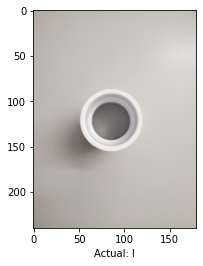

classification:  [ 126.44666 -126.67882 -127.54477]
localization:  [0. 1. 1. 1.]


In [54]:
#HERE I WANT TO GIVE DIRECTORY OF AN IMAGE AND HAVE MODEL PREDICT WHAT IT IS
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
#img = mpimg.imread('C:/Users/evanp/AI/Capstone/bounded_dataset/20210909_125548 - Copy.jpg')
#img_ = keras.preprocessing.image.load_img('C:/Users/evanp/AI/Capstone/bounded_dataset/20210909_125548 - Copy.jpg', target_size=(240, 180, 3))
#img_low = keras.preprocessing.image.img_to_array(img_)
#img_pred = model.predict(img_low)

img_low = image.load_img('C:/Users/evanp/AI/Capstone/bounded_dataset/20210909_125548 - Copy.jpg', target_size=(240, 180, 3))
#img_low = image.load_img('C:/Users/evanp/AI/Capstone/bounded_dataset/IMG_2895 (Custom).jpeg', target_size=(240, 180, 3))
plt.grid(False)
plt.imshow(img_low)
plt.xlabel("Actual: I")
plt.show()

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

prediction = model.predict(img_preprocessed)
print('classification: ', prediction[0][0])
print('localization: ', prediction[1][0])

In [7]:
from tensorflow import keras
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import numpy as np

#path of the directory where you want to save your model
frozen_out_path = 'C:/Users/evanp/AI/FrozenGraphs'
# name of the .pb file
frozen_graph_filename = "Evan_frozen_graph"
model = keras.models.load_model('C:/Users/evanp/AI/SavedModels')

In [8]:
# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

In [9]:
# Once we have our model in the format of ConcreteFunction,
# we convert its variables to constants.
# Get frozen graph def
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 28
        }
        dim {
          size: 28
        }
        dim {
          size: 1
        }
      }
    }
  }
}
node {
  name: "sequential/dense/Tensordot/free"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 3
          }
        }
        tensor_content: "\000\000\000\000\001\000\000\000\002\000\000\000"
      }
    }
  }
}
node {
  name: "sequential/dense/Tensordot/axes"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size

In [10]:
#this code allows me to later inspect the layers inside frozen graph
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

------------------------------------------------------------
Frozen model layers: 
x
sequential/dense/Tensordot/free
sequential/dense/Tensordot/axes
sequential/dense/Tensordot/concat/axis
sequential/dense/Tensordot/concat
sequential/dense/Tensordot/transpose
sequential/dense/Tensordot/Shape
sequential/dense/Tensordot/GatherV2/axis
sequential/dense/Tensordot/GatherV2
sequential/dense/Tensordot/Const
sequential/dense/Tensordot/Prod
sequential/dense/Tensordot/GatherV2_1/axis
sequential/dense/Tensordot/GatherV2_1
sequential/dense/Tensordot/Const_1
sequential/dense/Tensordot/Prod_1
sequential/dense/Tensordot/stack
sequential/dense/Tensordot/Reshape
sequential/dense/Tensordot/ReadVariableOp/resource
sequential/dense/Tensordot/ReadVariableOp
sequential/dense/Tensordot/MatMul
sequential/dense/Tensordot/Const_2
sequential/dense/Tensordot/concat_1/axis
sequential/dense/Tensordot/concat_1
sequential/dense/Tensordot
sequential/dense/BiasAdd/ReadVariableOp/resource
sequential/dense/BiasAdd/ReadVari

In [11]:
#serialize the frozen graph and its text representation to disk
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pb",
                  as_text=False)
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pbtxt",
                  as_text=True)

'C:/Users/evanp/AI/FrozenGraphs\\Evan_frozen_graph.pbtxt'

In [4]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('C:/Users/evanp/AI/FrozenGraphs/Evan_frozen_graph')
#model = tf.compat.v1.saved_model.load_v2("C:/Users/evanp/Downloads/TonyPB/saved_model")

OSError: SavedModel file does not exist at: C:/Users/evanp/AI/FrozenGraphs/Evan_frozen_graph/{saved_model.pbtxt|saved_model.pb}